In [1]:
import os
from abcli import file
from openai_cli import NAME, VERSION
from openai_cli.completion.functions import complete_prompt
import matplotlib.pyplot as plt
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"using {NAME}-{VERSION}.")

using openai_cli-2.83.1.


In [2]:
prompt = """"Write a python function named runme_001 
that inputs an image as a numpy array
and uses opencv vector functions
to return a darker version of the input image
without running a for loop on the pixels.
import all modules that are used in the code.
"""

In [3]:
success, metadata = complete_prompt(prompt)
assert success

message='Request to OpenAI API' method=post path=https://api.openai.com/v1/completions
message='OpenAI API response' path=https://api.openai.com/v1/completions processing_ms=15157 request_id=e269b8023c6d1a14081b7997d9aeed0b response_code=200
response: {
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "text": "\nimport cv2\nimport numpy as np\n\ndef runme_001(image):\n    # convert the image to grayscale\n    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n    \n    # get the image shape\n    H, W = gray_image.shape\n\n    # create a numpy array with shape (H, W, 1)\n    # and initialize it with zeros\n    dark_image = np.zeros((H, W, 1))\n\n    # use cv2.subtract to subtract a scalar value from the grayscale image\n    dark_image = cv2.subtract(gray_image, 100)\n\n    # use cv2.threshold to convert the values of the image\n    # to 0 or 255 based on a provided threshold\n    _, dark_image = cv2.threshold(dark_image, 0, 255, cv2.

In [4]:
code = metadata["response"]["choices"][0]["text"]
logger.info("code: {}".format(code))
exec(code)

code: 
import cv2
import numpy as np

def runme_001(image):
    # convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # get the image shape
    H, W = gray_image.shape

    # create a numpy array with shape (H, W, 1)
    # and initialize it with zeros
    dark_image = np.zeros((H, W, 1))

    # use cv2.subtract to subtract a scalar value from the grayscale image
    dark_image = cv2.subtract(gray_image, 100)

    # use cv2.threshold to convert the values of the image
    # to 0 or 255 based on a provided threshold
    _, dark_image = cv2.threshold(dark_image, 0, 255, cv2.THRESH_BINARY)
                                 
    # convert the 0-255 values into 8-bit values
    dark_image = np.array(dark_image, dtype='uint8')

    # return the darker version of the input image
    return dark_image


In [5]:
input_image = file.load_image(os.path.join(os.getenv("HOME",""),"git/blue-bracket/images/portal-34.jpg"))[1]

In [6]:
image_output = runme_001(input_image)
assert image_output.__class__.__name__ == "ndarray"

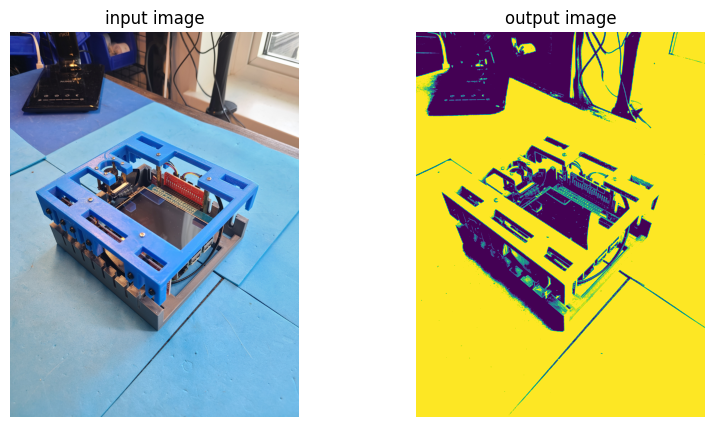

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(input_image)
axes[0].axis('off') 
axes[0].set_title("input image")

axes[1].imshow(image_output)
axes[1].axis('off')
axes[1].set_title("output image")

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1)
plt.show()

In [8]:
# END